<a href="https://colab.research.google.com/github/ShrimanthAM/DATA606Project/blob/main/YOLOv3_tiny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#### source code repo : https://github.com/AlexeyAB/darknet forked from https://pjreddie.com/darknet/


# YOLOv3_tiny model

# Loading the Darknet

### 1. Clone the Darknet Repo

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15035, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 15035 (delta 11), reused 17 (delta 6), pack-reused 15002
Receiving objects: 100% (15035/15035), 13.44 MiB | 18.86 MiB/s, done.
Resolving deltas: 100% (10210/10210), done.


### 2.Make changes in the coniguration file to enable GPU and OPENCV

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# looking at CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


### 3. build darknet - make it executable

In [ ]:

!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

### 4. Get Pre-trained weights trained on COCO dataset

In [ ]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2021-05-12 04:19:56--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  84.9MB/s    in 0.4s    

2021-05-12 04:19:56 (84.9 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



### 5. Defining functions to display the prediction

In [ ]:
# defining the helping function to display the image


def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


# Training the model on my custom data

## Required files 
1. test and train configuration files
2. data zip folder with images and corresponding labels text file
3. data and names file
4. train and val split file

These files have been uploaded to yolov3 google drive folder for easy access

In [ ]:
# mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# creating a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists
 2009.05451.pdf
'3rd Sem_Fall 2020 '
'5th Main Road 10.m4a'
'602 links.gdoc'
 603_project
'603 Project docs.gdoc'
 Articles.gdoc
'Artificial_Intelligence_for_Big_Data_Complete_Guid..._----_(Chapter_12_Cognitive_Computing).pdf'
'Artificial_Intelligence_for_Big_Data_Complete_Guid..._----_(Other_Books_You_May_Enjoy).pdf'
'August 2020.gdoc'
'August 2020.pdf'
'AWS Cloud Practitioner .gdoc'
 AWSome_Day_Online-Oct_16__2019.pdf
 AWSProServInternship
'Basic Architecture.gslides'
'Beta Release Review Assignment.gdoc'
 BUSTrPaper.pdf
 chatbot_covid.ipynb
'Cloud .gdoc'
 CMSC636FinalPresentation.gslides
'Colab Notebooks'
'Copy of Poster Template.gslides'
 DATA606
'DATA690 Fall 2020: S1.gdoc'
'Data690  HW1 S20 Sai Manikanta Yerram'
'Data690 HW4 S20 Sai Manikanta Yerram'
 DATA690NLP_PPT.gslides
'Document from Shrimanth'
 EDA_steps.gdoc
 Final_Exam
'Gmail - MPS DS Semester 1 Subjects.pdf'
 GraphDatabasesinFraudDetection.pdf
 HomeWork8

In [ ]:
%cd darknet

[Errno 20] Not a directory: 'darknet'
/content/darknet


In [ ]:
!pwd

/content/darknet


### 1. I have stored all my required files for training in yolov3 folder of Google drive

In [ ]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/yolov3

backup			       yolov3_custom2_lastest.weights
generate_train.py	       yolov3_custom2_last.weights
obj.data		       yolov3_custom2_test.cfg.gdoc
obj.names		       yolov3_custom_test.cfg
obj.zip			       yolov3_custom_train.cfg
train.txt		       yolov3-tiny.conv.11
val.txt			       yolov3_tiny_test.cfg
yolov3_custom2.cfg.gdoc        yolov3_tiny_train.cfg
yolov3_custom2_last_2.weights  yolov3_tiny_train_final.weights


In [ ]:
# copy the data zip folder to Google colab runtime
!cp /mydrive/yolov3/obj.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
   creating: data/obj/
  inflating: data/obj/0090f02cab.jpg  
  inflating: data/obj/0090f02cab.txt  
  inflating: data/obj/00d58c45ca.jpg  
  inflating: data/obj/00d58c45ca.txt  
  inflating: data/obj/01c53361f1.jpg  
  inflating: data/obj/01c53361f1.txt  
  inflating: data/obj/02454e17d0.jpg  
  inflating: data/obj/02454e17d0.txt  
  inflating: data/obj/02ced4ca2d.jpg  
  inflating: data/obj/02ced4ca2d.txt  
  inflating: data/obj/032b1d8b38.jpg  
  inflating: data/obj/032b1d8b38.txt  
  inflating: data/obj/053e81e4f6.jpg  
 extracting: data/obj/053e81e4f6.txt  
  inflating: data/obj/07b22d4b2d.jpg  
  inflating: data/obj/07b22d4b2d.txt  
  inflating: data/obj/07be4f3426.jpg  
  inflating: data/obj/07be4f3426.txt  
  inflating: data/obj/0a4fa50ba0.jpg  
  inflating: data/obj/0a4fa50ba0.txt  
  inflating: data/obj/0dbbfbda0c.jpg  
  inflating: data/obj/0dbbfbda0c.txt  
  inflating: data/obj/0f69014c64.jpg  
  inflating: data/obj/0f69014c64.txt  
  inflating: data/ob

In [ ]:
!pwd

/content/darknet


In [ ]:
# upload the custom train .cfg to Google Colab runtime from Google Drive
!cp /mydrive/yolov3/yolov3_tiny_train.cfg ./cfg

In [ ]:
# upload the custom test .cfg to Google Colab runtime from Google Drive
!cp /mydrive/yolov3/yolov3_tiny_test.cfg ./cfg


In [ ]:
!pwd

/content/darknet


In [ ]:
# upload the obj.names and obj.data files to Google Colab runtime from Google Drive
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

In [ ]:
#upload the validation file to runtime from Google drive 
!cp /mydrive/yolov3/val.txt ./data

In [ ]:
#upload the train file to runtime from Google drive 
!cp /mydrive/yolov3/train.txt ./data

In [ ]:
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  val.txt
dog.jpg     horses.jpg	 obj			   person.jpg	     voc.names


### Upload the pretrained convolutional layer weights(initial weights)

In [ ]:
!cp /mydrive/yolov3/yolov3-tiny.conv.11 /content/darknet

### Training the model


Note: Please refer to v1 notebook for training results

In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_tiny_train.cfg yolov3-tiny.conv.11 -dont_show

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_tiny_train
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 32, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 1

### displaying the evaluation mAP values on the latest weights(i.e after 4000 epochs)

In [ ]:
!./darknet detector map data/obj.data cfg/yolov3_tiny_test.cfg /content/gdrive/MyDrive/yolov3/yolov3_tiny_train_final.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 con

### testing the model on few images and a video file captured pi camera 

In [ ]:
# video file
!./darknet detector demo data/obj.data cfg/yolov3_tiny_test.cfg /content/gdrive/MyDrive/yolov3/yolov3_tiny_train_final.weights -dont_show video.mp4 -i 0 -out_filename results.avi

Streaming output truncated to the last 5000 lines.
Objects:


FPS:16.1 	 AVG_FPS:17.0

 cvWriteFrame 
Objects:


FPS:15.9 	 AVG_FPS:17.0

 cvWriteFrame 
Objects:


FPS:15.8 	 AVG_FPS:17.0

 cvWriteFrame 
Objects:


FPS:15.8 	 AVG_FPS:17.0

 cvWriteFrame 
Objects:


FPS:15.7 	 AVG_FPS:17.0

 cvWriteFrame 
Objects:


FPS:15.7 	 AVG_FPS:17.0

 cvWriteFrame 
Objects:


FPS:15.6 	 AVG_FPS:17.0

 cvWriteFrame 
Objects:


FPS:15.6 	 AVG_FPS:17.0

 cvWriteFrame 
Objects:


FPS:15.4 	 AVG_FPS:17.0

 cvWriteFrame 
Objects:


FPS:17.1 	 AVG_FPS:17.0

 cvWriteFrame 
Objects:


FPS:17.0 	 AVG_FPS:17.0

 cvWriteFrame 
Objects:


FPS:16.8 	 AVG_FPS:17.0

 cvWriteFrame 
Objects:


FPS:16.9 	 AVG_FPS:17.0

 cvWriteFrame 
Objects:


FPS:16.5 	 AVG_FPS:17.0

 cvWriteFrame 
Objects:


FPS:16.4 	 AVG_FPS:17.0

 cvWriteFrame 
Objects:


FPS:16.3 	 AVG_FPS:17.0

 cvWriteFrame 
Objects:


FPS:17.1 	 AVG_FPS:17.0

 cvWriteFrame 
Objects:


FPS:18.5 	 AVG_FPS:17.0

 cvWriteFrame 
Objects:


FPS:18.4 	 AVG_FPS:1

In [ ]:
# running the model on a test image
!./darknet detector test data/obj.data cfg/yolov3_tiny_test.cfg /content/gdrive/MyDrive/yolov3/yolov3_tiny_train_final.weights /content/gdrive/MyDrive/yolov4/PXL_20210429_182050525.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 con

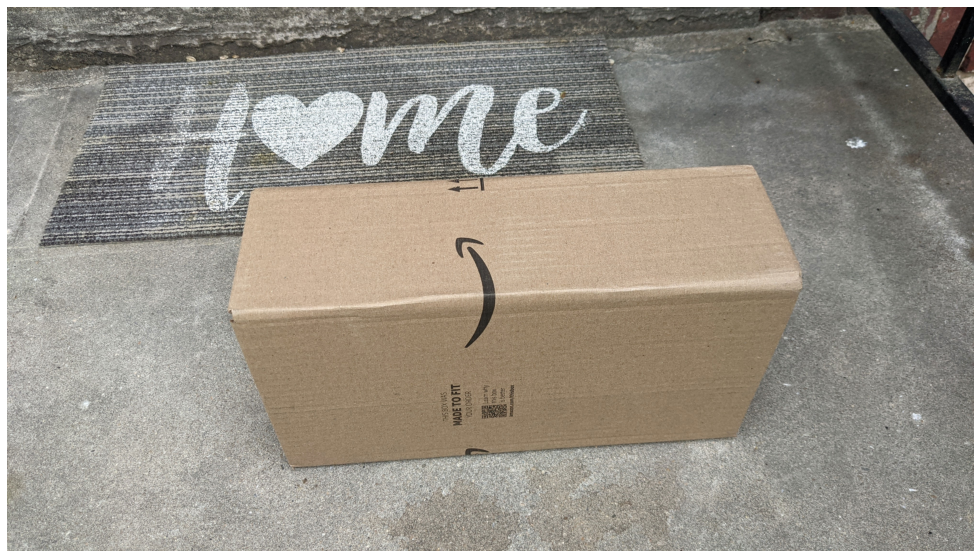

In [ ]:
imShow('predictions.jpg')

In [ ]:
# running the model on a test image
!./darknet detector test data/obj.data cfg/yolov3_tiny_test.cfg /content/gdrive/MyDrive/yolov3/yolov3_tiny_train_final.weights /content/darknet/data/obj/0f69014c64.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 0, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 con

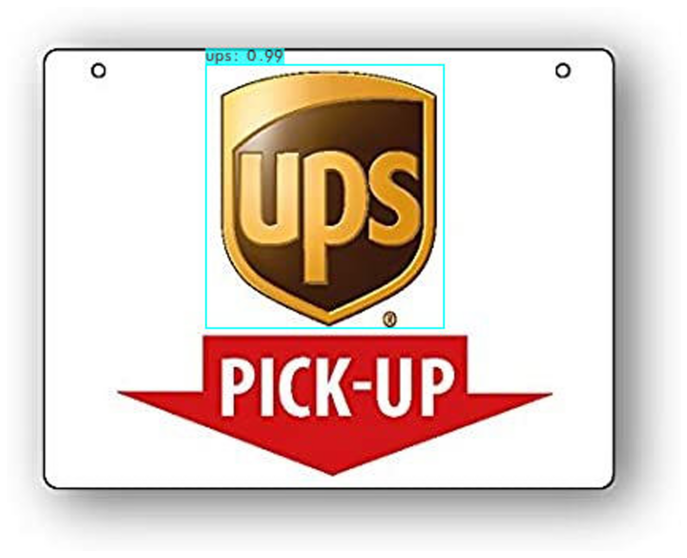

In [ ]:
imShow('predictions.jpg')

In [ ]:
# running the model on a test image
 !./darknet detector test data/obj.data cfg/yolov3_tiny_test.cfg /content/darknet/backup/yolov3_tiny_train_final.weights /content/darknet/data/obj/0090f02cab.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 0, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 con

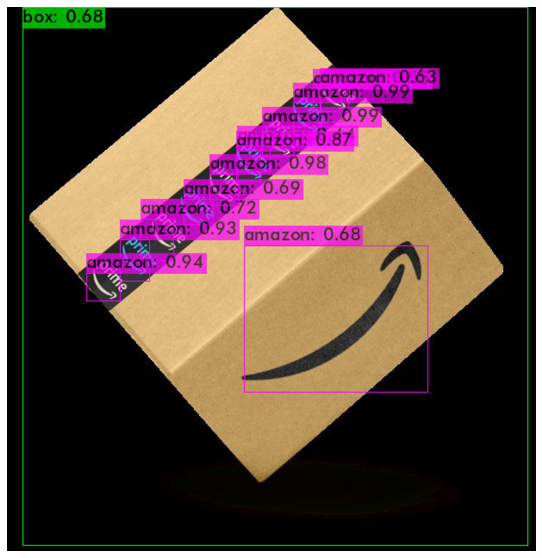

In [ ]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_tiny_test.cfg /content/darknet/backup/yolov3_tiny_train_final.weights /content/darknet/data/obj/07be4f3426.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 0, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 con

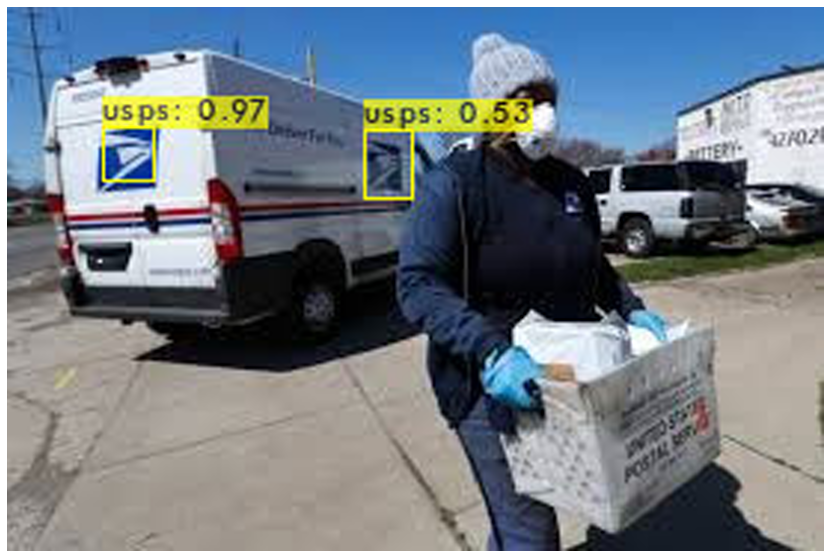

In [ ]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_tiny_test.cfg /content/darknet/backup/yolov3_tiny_train_final.weights /content/darknet/data/obj/0dbbfbda0c.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 700, cudnn_half = 0, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 con

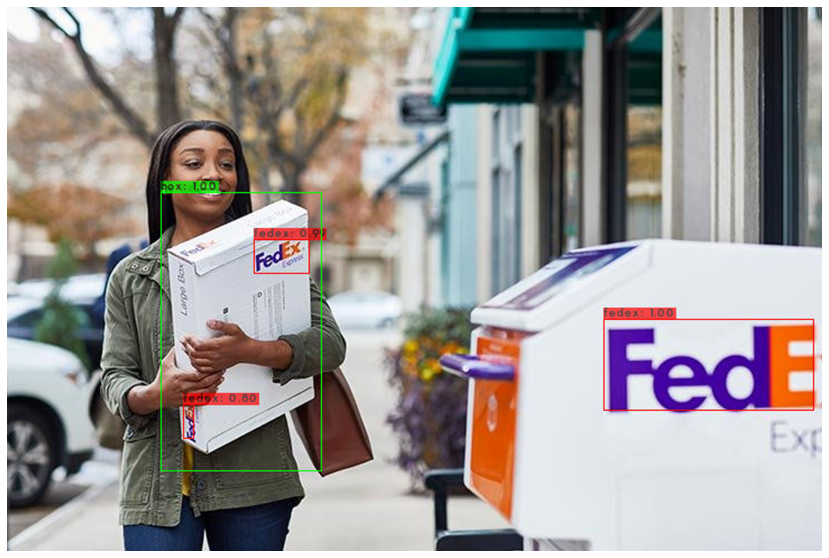

In [ ]:
imShow('predictions.jpg')